In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
plt.style.use('seaborn')


In [24]:
ais = pd.read_csv('../bigdata/ais-observations-1-week-20180315.csv', parse_dates = ['timestamp'])
ais = ais.sort_values(by=['timestamp'])
ais.head()

,timestamp,mmsi,lon,lat,sog,cog,heading
2263440,2018-03-14 23:59:59.064,276776000,21.473023,61.126297,0.0,63.7,323
2263441,2018-03-14 23:59:59.066,230992260,21.472692,61.127272,0.0,268.4,184
2263442,2018-03-14 23:59:59.067,230992660,28.877223,61.877110,0.0,0.0,511
2263443,2018-03-14 23:59:59.074,230115340,21.464200,61.594145,0.0,198.4,264
2263444,2018-03-14 23:59:59.089,230052840,28.386033,61.608773,0.0,1.6,1


In [25]:
#Aura 230601000
#BBC Virginia 305463000
#Kiisla 230956000
#Sisu 230289000
#Ymer 265066000
test_ais = ais[(ais['mmsi'].isin([230601000, 305463000, 230956000, 230289000, 265066000])) & 
            (ais['timestamp'] >= '2018-03-19 00:00:00') &
            (ais['timestamp'] < '2018-03-20 00:00:00')]
test_ais.to_csv("../testdata/testdata.csv", index=False)

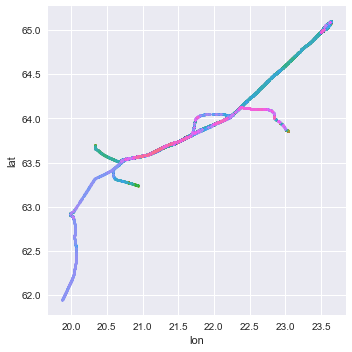

In [29]:
sns.lmplot(x="lon", y="lat", data=test_ais, hue="sog", fit_reg=False, legend=False, scatter_kws={"s": 3})